### Objectif du TP
> Le but du tp est de mettre en pratique un algorithme de clustering (K-means). Ici, il s'agira de regrouper les éléments du dataset en groupes, appelés clusters, afin de faire ressortir les patterns cachés dans le jeu de données en regroupant les éléments qui se ressemblent.

### Description du dataset
> ```fromage.xlxs``` : Ensemble de différents fromages classifiés par leurs propriétés nutritives. Il s'agira donc d'identifier des groupes de fromages homogènes, ayant des caractéristiques similaires

### Étapes clés de l'analyse
- 1 : Chargement et description des données
- 2 : Standardisation
- 3 : Clustering en 4 groupes

## 1 - Chargement et description des données

In [1]:
# Chargement des données
import pandas as pd
fromage = pd.read_excel("fromage.xlsx")
fromage = fromage.set_index("Fromages")
fromage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, CarredelEst to Yaourtlaitent.nat.
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   calories     29 non-null     int64  
 1   sodium       29 non-null     float64
 2   calcium      29 non-null     float64
 3   lipides      29 non-null     float64
 4   retinol      29 non-null     float64
 5   folates      29 non-null     float64
 6   proteines    29 non-null     float64
 7   cholesterol  29 non-null     int64  
 8   magnesium    29 non-null     int64  
dtypes: float64(6), int64(3)
memory usage: 2.3+ KB


> Ici on importe la librairie ```pandas``` qui permet la manipulation et l'analyse des données. Ce qui nous permet de lire fichier texte ```fromage.xlsx```

In [4]:
# Premières lignes
fromage.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


<AxesSubplot:xlabel='lipides', ylabel='proteines'>

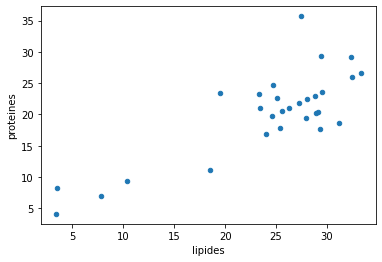

In [2]:
# Nuage de points entre les protéines et les lipides
fromage.plot(x="lipides", y="proteines", kind="scatter")

<AxesSubplot:xlabel='lipides', ylabel='cholesterol'>

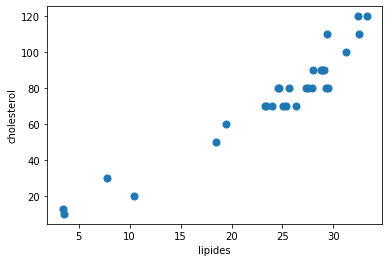

In [3]:
# Nuage de points entre les protéines et les cholesterols
fromage.plot(x="lipides", y="cholesterol", kind="scatter", s=50)

> Ici on utilise la méthode ```plot()``` de la librairie ```pandas``` qui permet de tracer des courbes qui relient des points dont les abscisses et ordonnées sont sélectionnées au préalable.

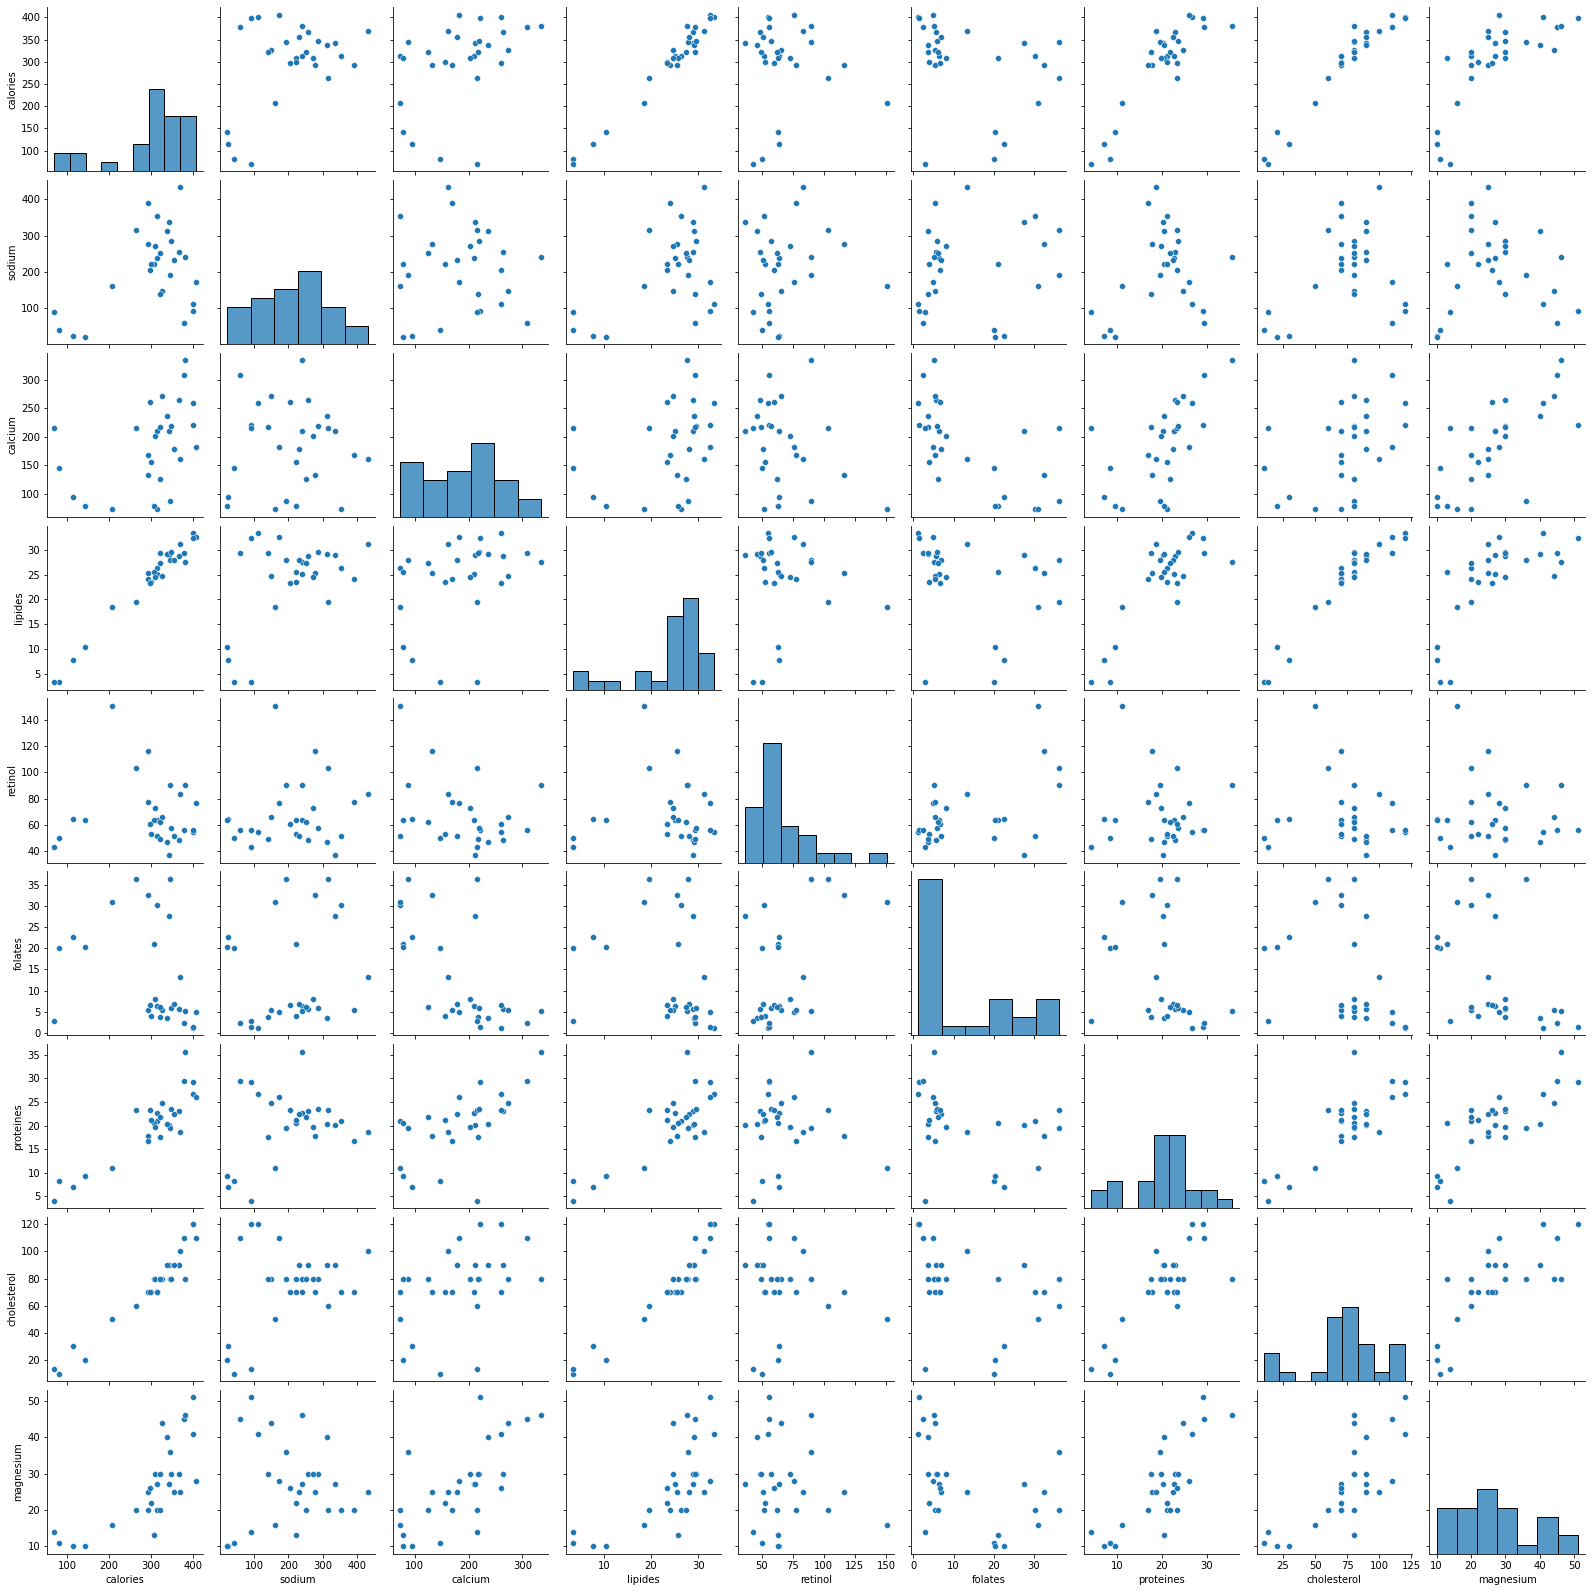

In [4]:
# Nuage par paire
import seaborn as sns
sns.pairplot(fromage)

> Ici on importe la librairie ```seaborn``` qui est une bibliothèque de visualisation de données Python basée sur matplotlib . Il fournit une interface de haut niveau pour dessiner des graphiques statistiques attrayants et informatifs. On fait appel ensuite à la méthode ```pairplot()``` qui permet de tracer des relations par paires dans un ensemble de données.

### Interprétation du graphique :
<em>Ici on peut constater des corrélations potentielles : </em>
- Protéines - Lipides
- Protéines - Calcium 
- Calories &nbsp;&nbsp;- Lipdes 
- etc...

> <strong>Remarque</strong> : On peut voir que des groupes semblent apparaître naturellement. C'est ce que tentera de démontrer la suite du code.

## 2 - Standardisation

<strong>Objectif de la standardisation</strong> : <br>
Il est recommandé de normaliser les données, cela permettra par la suite de déterminer plus facilement les clusters (groupes) grâce aux k-means (moyennes) 

#### première méthode

In [8]:
# Moyennes par variable
fromage.mean(axis=0)

calories       300.034483
sodium         210.086207
calcium        185.734483
lipides         24.158621
retinol         67.562069
folates         13.010345
proteines       20.168966
cholesterol     74.586207
magnesium       26.965517
dtype: float64

In [9]:
# Écarts-type par variable
fromage.std(axis=0)

calories        91.914356
sodium         108.678923
calcium         72.528882
lipides          8.129642
retinol         24.163098
folates         11.723339
proteines        6.959788
cholesterol     28.245755
magnesium       11.318388
dtype: float64

In [10]:
# Standardisation
Z = (fromage - fromage.mean(axis=0)) / fromage.std(axis=0)
print(Z)

                    calories    sodium   calcium   lipides   retinol  \
Fromages                                                               
CarredelEst         0.151941  1.319610 -1.559854  0.263404 -0.660597   
Babybel             0.151941  0.256846  0.331806  0.115796 -0.159833   
Beaufort            1.098474 -0.902532  1.015671  1.124450 -0.524025   
Bleu                0.456572  1.158585  0.349730  0.583221 -1.260686   
Camembert          -0.392044  0.956154  0.415910 -0.573041  1.466614   
Cantal              0.728564  0.422472  1.079094  0.570920 -0.776476   
Chabichou           0.478331 -0.166419 -1.358555  0.460215  0.932742   
Chaource           -0.087413  0.606500 -0.728461  0.152698  2.021178   
Cheddar             1.152872 -0.350447 -0.047353  1.026045  0.365762   
Comte               1.076714 -1.086560  0.479333  1.013744 -0.482640   
Coulomniers         0.086662  0.109624 -1.468856  0.177299 -0.163972   
Edam                0.293377 -0.571281  1.192153  0.066593 -0.07

In [11]:
# Vérification de la standardisation - moyennes
Z.mean(axis=0)

calories      -7.656711e-17
sodium         1.071939e-16
calcium        4.689735e-16
lipides        3.368953e-16
retinol        3.828355e-17
folates       -2.679849e-17
proteines      9.188053e-17
cholesterol   -1.990745e-16
magnesium      9.953724e-17
dtype: float64

In [12]:
# Vérification - écarts-type
Z.std(axis=0)

calories       1.0
sodium         1.0
calcium        1.0
lipides        1.0
retinol        1.0
folates        1.0
proteines      1.0
cholesterol    1.0
magnesium      1.0
dtype: float64

In [13]:

# deuxième méthode de centrage réduction des données  
from sklearn import preprocessing

fromage_cr = preprocessing.scale(fromage)
fromage_cr

array([[ 1.54629966e-01,  1.34296773e+00, -1.58746440e+00,
         2.68066256e-01, -6.72289850e-01,  1.50091119e+00,
         1.21518677e-01, -1.65242000e-01, -6.26309169e-01],
       [ 1.54629966e-01,  2.61392734e-01,  3.37679113e-01,
         1.17845552e-01, -1.62662483e-01, -5.73842591e-01,
         3.55479948e-01, -1.65242000e-01,  3.10054044e-03],
       [ 1.11791739e+00, -9.18507266e-01,  1.03364936e+00,
         1.14435370e+00, -5.33300568e-01, -1.02525346e+00,
         9.40383125e-01,  1.63626853e+00,  1.26191996e+00],
       [ 4.64653504e-01,  1.17909273e+00,  3.55920269e-01,
         5.93544448e-01, -1.28300033e+00,  1.25784380e+00,
         4.53804189e-03,  5.55362210e-01,  3.10054044e-03],
       [-3.98983494e-01,  9.73078448e-01,  4.23272229e-01,
        -5.83184399e-01,  1.49257351e+00,  2.03045086e+00,
         4.72460583e-01, -5.25544105e-01, -6.26309169e-01],
       [ 7.41460234e-01,  4.29949877e-01,  1.09819499e+00,
         5.81026056e-01, -7.90220150e-01, -6.346094

## 3 - Clustering en quatre groupes

In [14]:
# K-means avec 4 groupes
from sklearn import cluster

res = cluster.KMeans(n_clusters=4)


> Ici on créé le modèle avec le nombre de clusters que l'on veut avoir grâce à la méthode ```KMeans()```. 

<u><em>Paramètres de la méthode : </em></u>
- <strong>n_clusters :</strong> permet de définir le nombre de clusters désirés. Nous choisirons 4 clusters
- <strong>n_init :</strong> permet de définir le nombre d'initalisation que l'on veut avoir, c'est à dire le nombre de fois que l'algorithme sera exécuté. Par défaut le nombre est fixé à 10
- <strong>max_iter :</strong> permet de définir le nombre d'itérations max. Par défaut le nimbre est fixé à 300
- <strong>init :</strong> permet de choisir la stratégie d'initialisation qui sera utilisée. Par défaut c'est la méthode K-Means++  qui est paramétrée, qui est une méthode d'initialisation qui consiste à placer les centroids sur des points du dataset les uns les autres, ce qui facilitera la convergence des centroids vers des positions d'équilibre

In [15]:
res.fit(Z)

KMeans(n_clusters=4)

> Ici on utilise la méthode ```fit()``` qui permettra d'entraîner le dataset 

> Ici la méthode ```pedict()``` permettra de voir comment sont classés les échantillons

In [16]:
# num de cluster affectés aux groupes
res.labels_

array([2, 0, 3, 0, 2, 0, 2, 2, 0, 3, 2, 3, 3, 2, 0, 1, 1, 0, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 0, 1])

In [17]:
# Éffectifs par groupe
import numpy
numpy.unique(res.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([14,  4,  6,  5], dtype=int64))

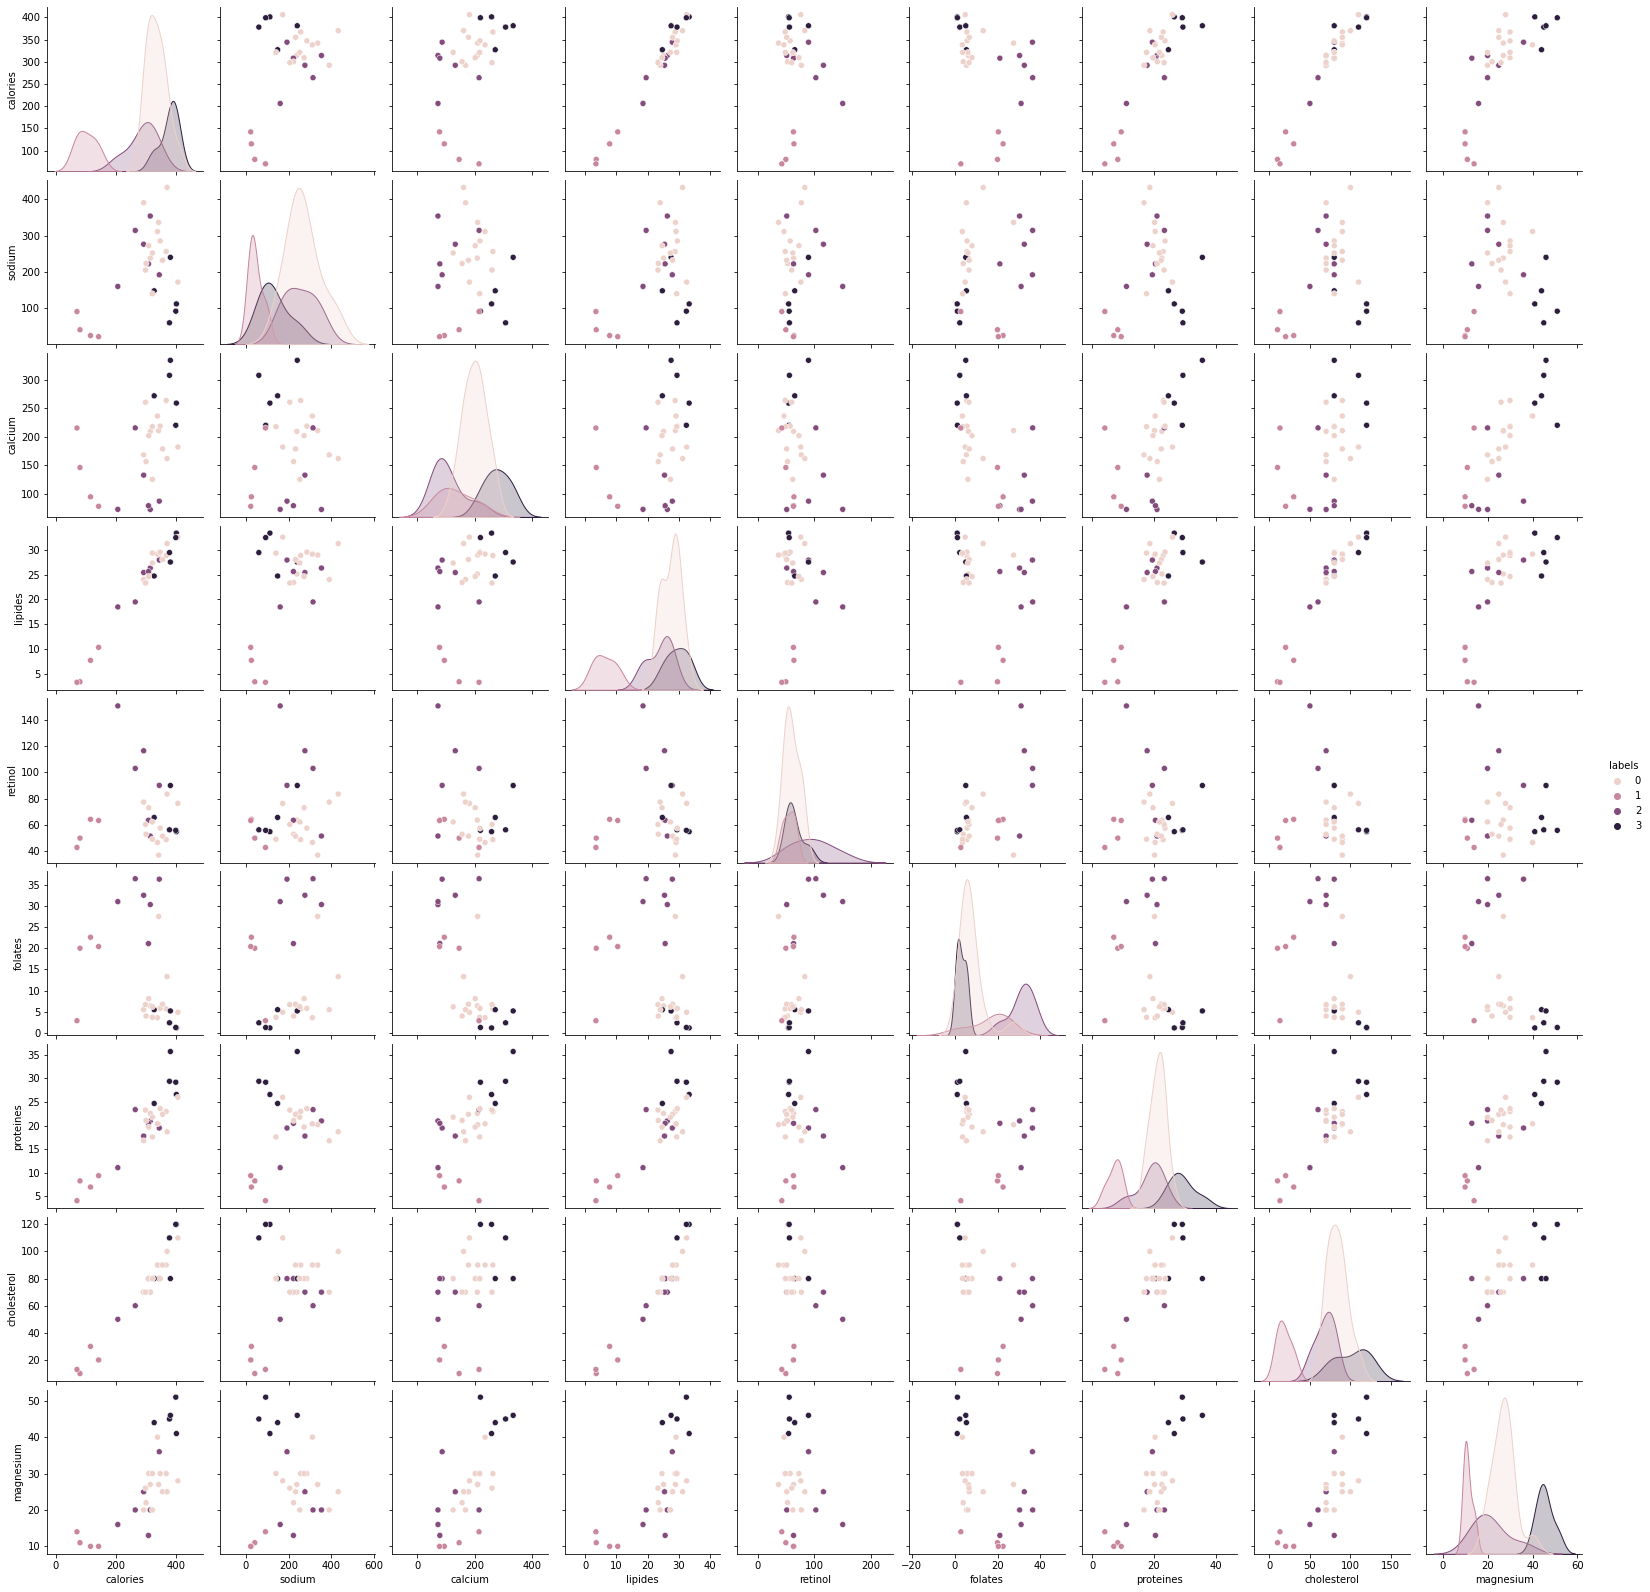

In [18]:
# Rajouter la variable au data-frame initial
B = fromage.copy()
B['labels'] = res.labels_
# Configuration des points dans le plan
# Des variables prises par paires
sns.pairplot(B,hue="labels")

### Interprétation du graphique :
<em>Ici on peut constater visuellement les quatre clusters déterminés plus haut. Ce type de visualisation facilite grandement l'interprétation des données.</em>

<hr>

In [19]:
# Moyennes par groupe
gb = fromage.groupby(res.labels_)
# Éffectifs par classe
gb.size()

0    14
1     4
2     6
3     5
dtype: int64

> Ici on peut voir le nombre total de fromage par cluster

<hr>

In [20]:
# Moyennes par classe
gb.mean()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,334.285714,267.428571,199.70,27.500000,60.050000,7.728571,21.228571,83.571429,27.142857
1,101.750000,44.750000,133.75,6.275000,55.150000,16.475000,7.200000,18.250000,11.250000
2,288.000000,252.916667,110.10,23.866667,95.866667,31.266667,18.883333,68.333333,21.666667
3,377.200000,130.400000,278.98,29.460000,64.560000,3.120000,29.120000,102.000000,45.400000


> Ici on peut voir la moyenne de chaque nutriment pour chaque cluster.

## Méthode d'optimisation:(méthode du coude et silhouette /  Indice de Davies-Bouldin)

## Méthode du coude : détermination du meilleur K
Un pipeline SKLearn est créé pour y inclure le preprocessing et la visualisation de la méthode du coude de notre KMeans.

In [25]:
!pip install kmodes

In [32]:
!pip install yellowbrick

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)


In [35]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

n_f = list(fromage.select_dtypes(include=['int64', 'float64']).columns)
numerical_features = n_f
numerical_features

scaler = MinMaxScaler()
# scaler = StandardScaler()
preprocessor = ColumnTransformer([
    ('scaler', scaler, numerical_features)])

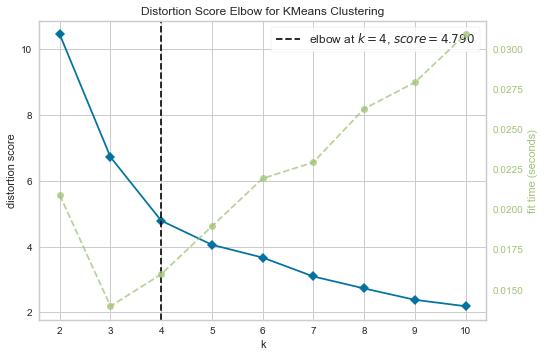

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
from sklearn.pipeline import Pipeline, make_pipeline
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
X = Z


# Elbow method
kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor), 
    ("kelbowvisualizer", KElbowVisualizer(KMeans(), K=(4, 12)))])
kmeans_visualizer.fit(X)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

Grâce à la méthode du coude basée sur le score de distortion (somme moyenne des carrés des distances aux centres), une segementation en k=4 clusters serait la meilleure option.

## Coefficient de silhouette
Pour vérifier si ce clustering fonctionne, nous allons utiliser SilhouetteVisualizer pour afficher le coefficient de silhouette pour un échantillonage de chaque cluster. Cela permet de visualiser la densité et la séparation des clusters.

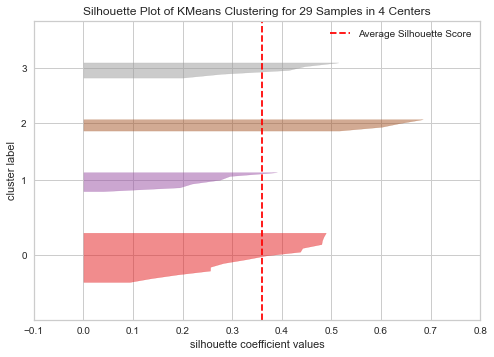

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 29 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [39]:
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance
# Best K in Elbow
K = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_

# Silhouette Visualizer
silhouette_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("silhouettevisualizer", SilhouetteVisualizer(KMeans(K)))])
silhouette_visualizer.fit(X)
silhouette_visualizer.named_steps['silhouettevisualizer'].show()

Le score de chaque échantillon est calculé en faisant la moyenne du coefficient de silhouette (différence entre la distance moyenne intra-cluster et la distance moyenne du cluster le plus proche pour chaque échantillon), normalisée par la valeur maximale. Cela nous donne un score entre -1 et 1, qui nous permet de déterminer si la séparation est efficace ou si les points sont assignés au mauvais cluster.

Ici, les clusters semblent relativement bien répartis et les séparations sont claires.

##  Indice de Davies-Bouldin

In [40]:

from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(fromage_cr, res.labels_)

0.9628418312716404